In [47]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [48]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv(r'./Resources/crypto_market_data.csv', index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [50]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [51]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
StandardScaler().fit(market_data_df)

StandardScaler()

In [52]:
# Create a DataFrame with the scaled data
crypto_scaled = StandardScaler().fit_transform(market_data_df)

# Copy the crypto names from the original data
crypto_scaled_df = pd.DataFrame(crypto_scaled, columns=market_data_df.columns, index=market_data_df.index)

# Set the coinid column as index
crypto_scaled_df.index = market_data_df.index

# Display sample data
crypto_scaled_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.

In [53]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11


# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(crypto_scaled_df)
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
{"k": range(1, 11), "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
inertia_df = pd.DataFrame({"k": range(1, 11), "inertia": inertia})

# Display the DataFrame
inertia_df

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,123.190482
3,4,91.148890
4,5,69.668772
5,6,55.718576
6,7,43.219959
7,8,36.791070
8,9,34.918598
9,10,30.491500


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

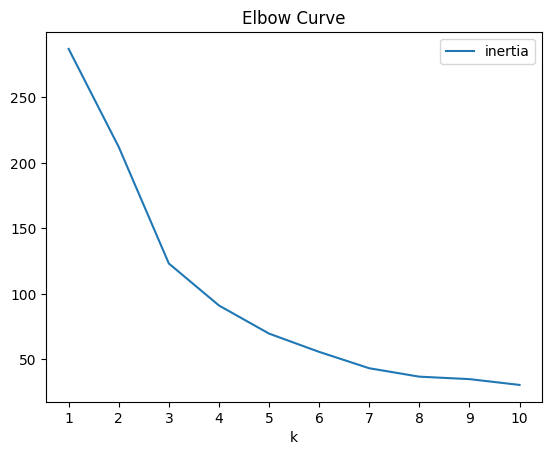

In [54]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
inertia_df.plot(x="k", y="inertia", title="Elbow Curve", xticks=range(1, 11))

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** Per the generated graph, either 4 or 5 can be described as the best value for k means. Nonetheless i opt-in for 4 as the best value of the K means

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [ ]:
# Initialize the K-Means model using the best value for k
k_model = KMeans(n_clusters=4)

In [56]:
# Fit the K-Means model using the scaled data
k_model.fit(crypto_scaled_df)

KMeans(n_clusters=5)

In [57]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_model.predict(crypto_scaled_df)

# View the resulting array of cluster values.
k_model.labels_

array([3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 1, 3, 0, 0, 2, 0, 0, 0, 0],
      dtype=int32)

In [60]:
# Create a copy of the DataFrame
kmeans_df = crypto_scaled_df.copy()

In [62]:
# Add a new column to the DataFrame with the predicted clusters
kmeans_df["crypto_cluster"] = k_model.labels_

# Display sample data
kmeans_df.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


<Axes: title={'center': 'Crypto Clusters'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

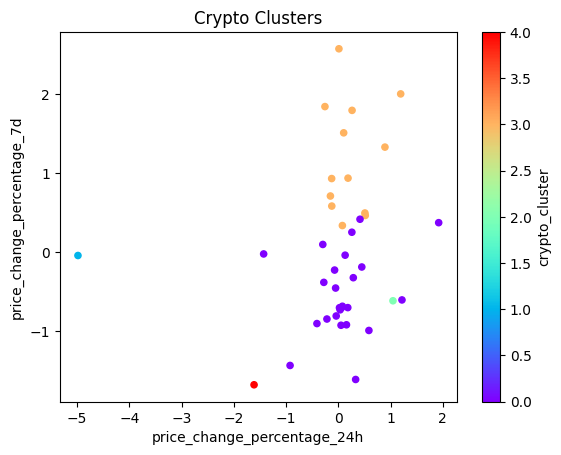

In [63]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
kmeans_df.plot.scatter(x="price_change_percentage_24h", 
                       y="price_change_percentage_7d", 
                       c="crypto_cluster", 
                       colormap="rainbow", 
                       title="Crypto Clusters"
                       )    

### Optimize Clusters with Principal Component Analysis.

In [37]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [78]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_model_df = pca_model.fit_transform(crypto_scaled_df)

# View the first five rows of the DataFrame. 
pca_model_df[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [74]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
display(pca_model.explained_variance_ratio_)
display(sum(pca_model.explained_variance_ratio_).round(4))

array([0.3719856 , 0.34700813, 0.17603793])

np.float64(0.895)

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Per the analyzed data, the total explained variance of the three principal components appears to be 0.895

In [81]:
# Create a new DataFrame with the PCA data.
pca_model_df = pd.DataFrame(pca_model_df, columns=["PCA1", "PCA2", "PCA3"], index=crypto_scaled_df.index)
# Copy the crypto names from the original data
# Set the coinid column as index
pca_model_df.index = market_data_df.index
# Display sample data
display(pca_model_df.head(10))

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [82]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11


# Create an empty list to store the inertia values
pca_inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_model_df)
    pca_inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
{"k": range(1, 11), "inertia": pca_inertia}

# Create a DataFrame with the data to plot the Elbow curve
pca_kmeans_inertia_df = pd.DataFrame({"k": range(1, 11), "inertia": pca_inertia})

# Display the DataFrame
display(pca_kmeans_inertia_df)

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,38.705964
5,6,27.618972
6,7,21.465014
7,8,17.850233
8,9,14.567414
9,10,10.630648


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

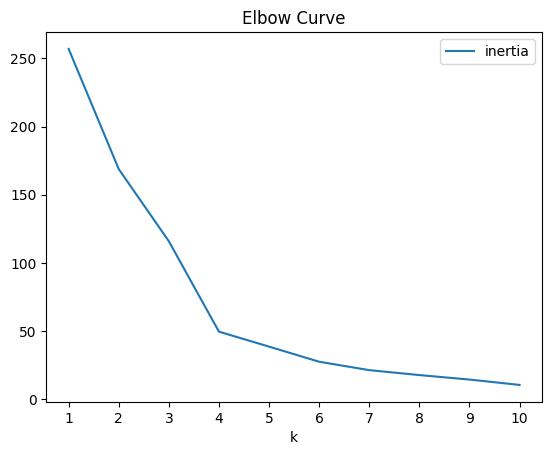

In [83]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
pca_kmeans_inertia_df.plot(x="k", y="inertia", title="Elbow Curve", xticks=range(1, 11))   

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** Per the generated graph, either 4 can be used to describe the best value for k means. 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Per the data generated, there is no satistical diffrences of the best k value between both inferred data 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [84]:
# Initialize the K-Means model using the best value for k
k_pca_model = KMeans(n_clusters=4)

In [85]:
# Fit the K-Means model using the PCA data
k_pca_model.fit(pca_model_df)

KMeans(n_clusters=4)

In [86]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_pca_model.predict(pca_model_df)

# Print the resulting array of cluster values.
for i in k_pca_model.labels_:
    print(i)

3
3
0
0
3
3
3
3
3
0
0
0
0
3
0
3
0
0
3
0
0
3
0
0
0
0
0
0
3
0
0
0
1
3
0
0
2
0
0
0
0


In [87]:
# Create a copy of the DataFrame with the PCA data
pca_kmeans_df = pca_model_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_kmeans_df["crypto_predicted_cluster"] = k_pca_model.labels_

# Display sample data
display(pca_kmeans_df.head(5))

,PCA1,PCA2,PCA3,crypto_predicted_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,3
ethereum,-0.458261,0.458466,0.952877,3
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,3


<Axes: title={'center': 'Crypto Clusters'}, xlabel='PCA1', ylabel='PCA2'>

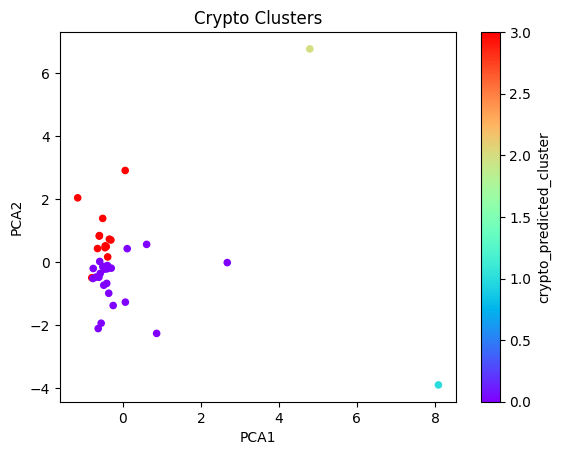

In [88]:
# Create a scatter plot by setting `x="PCA1"` and `y="PCA2"`. 
pca_kmeans_df.plot.scatter(x="PCA1", 
                           y="PCA2", 
                           c="crypto_predicted_cluster", 
                           colormap="rainbow", 
                           title="Crypto Clusters"
                           )

### Determine the Weights of Each Feature on each Principal Component

In [91]:
#Create a DataFrame that shows the weights of each feature (column) for each principal component by using the columns from the original scaled DataFrame as the index
pca_final_df = pd.DataFrame(pca_model.components_, columns=crypto_scaled_df.columns)    
# pca_kmeans_df.index = crypto_scaled_df.index
display(pca_final_df.head(5))

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,-0.416728,-0.102432,-0.009162,0.191523,0.320365,0.594468,0.568379
1,0.358162,0.227432,0.540415,0.562182,0.434040,0.027735,-0.150789
2,-0.218795,0.787670,0.349534,-0.181744,-0.361377,0.039733,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    * Row 0 has the strongest positive influence on long-term price changes (200d, 1y).
    * Row 1 has the strongest positive influence on shorter-term changes (24h, 14d, 30d).
    * Row 2 has the strongest positive influence on 7-day changes but the strongest negative impact on 30d and 60d changes.